In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd


In [2]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
replicate='lc_gsms_9_6_12-54-29-9837/'
filename='MD_Matrix_Proto.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)
AREPuckFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+filename
AREPotatoFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+filename
ARETricycleFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+filename

Filepath: /home/ebb505/ARE_Project/are-logs/lc_gsms_9_6_12-54-29-9837/MD_Matrix_Proto.csv


In [3]:
# Import data from csv
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[1:-1]) # Last character is empty for some reason
# Import hand-made robots
my_robot = []
with open(AREPuckFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[1:]) # Last character is empty for some reason        
with open(AREPotatoFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[1:]) # Last character is empty for some reason        
with open(ARETricycleFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[1:]) # Last character is empty for some reason        

In [4]:
# Estimate average for each generation
population = 25
matrixSize = 13
voxelsNumber = matrixSize*matrixSize*matrixSize
evaluations = int(len(my_list)/matrixSize)
featureSize = len(my_list[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array
robotDat = np.array([[float(y) for y in x] for x in my_robot]) # Convert to array

Number of evaluations:  15850 Features size:  156 Generations:  634


In [5]:
# Process data ALL evolved robots
indDistanceList = []
for currentInd in range(evaluations):
    tempList = []
    print("Progress: ", currentInd/evaluations)
    for ind in range(evaluations):
        differentVoxels = 0
        for i in range(matrixSize):
            for j in range(len(dat[ind*matrixSize+i])):
                if(dat[currentInd*matrixSize+i][j] != dat[ind*matrixSize+i][j]):
                    differentVoxels = differentVoxels + 1
        if(currentInd != ind): # Do not add the ind itself
            tempList.append(differentVoxels)
    sortedList = np.sort(tempList)
    indDistanceList.append(np.mean(sortedList[:14])/voxelsNumber)
    clear_output(wait=True)
print("Done!")

Progress:  0.00012618296529968455


KeyboardInterrupt: 

In [117]:
print(len(robotDat))

39


In [5]:
# Process data hand designed robots
robotDistance = []
for currentInd in range(int(len(robotDat)/matrixSize)):
    tempList = []
    tempProgr = []
    for ind in range(evaluations):
        print("Robot:", currentInd, " Progress: ", ind/evaluations)
        differentVoxels = 0
        for i in range(matrixSize):
            for j in range(len(dat[ind*matrixSize+i])):
                if(robotDat[currentInd*matrixSize+i][j] != dat[ind*matrixSize+i][j]):
                    differentVoxels = differentVoxels + 1
        if(currentInd != ind): # Do not add the ind itself
            tempList.append(differentVoxels)
        sortedList = np.sort(tempList)
        if(len(sortedList) < 15):
            tempProgr.append(np.mean(sortedList)/voxelsNumber)
        else:
            tempProgr.append(np.mean(sortedList[:14])/voxelsNumber)
        clear_output(wait=True)
    robotDistance.append(tempProgr)
print("Done!")

Done!


In [106]:
print(len(robotDistance))
print(len(robotDistance[2]))
print(len(indDistanceList))

3
1850
1850


In [6]:
# Progress ALL robots
progressSparseness = []
progressAREPuck = []
progressAREPotato = []
progressARETricycle = []
for i in range(population,evaluations,population):
    #progressSparseness.append(np.mean(indDistanceList[:i]))
    progressAREPuck.append(robotDistance[0][i])
    progressAREPotato.append(robotDistance[1][i])
    progressARETricycle.append(robotDistance[2][i])

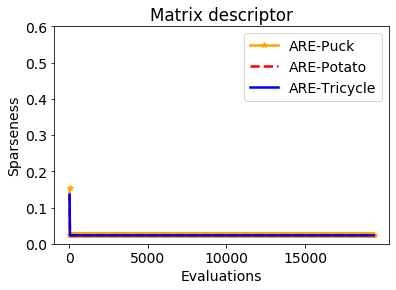

In [7]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)
plt.plot(xValues, progressAREPuck, '-*', color='orange',  linewidth=2.5)
plt.plot(xValues, progressAREPotato, '--', color='red',  linewidth=2.5)
plt.plot(xValues, progressARETricycle, '-', color='blue',  linewidth=2.5)
# plt.plot(xValues, progressSparseness, '-', color='black',  linewidth=2.5)

plt.xlabel('Evaluations')
plt.ylabel('Sparseness')

axes = plt.gca()
axes.set_ylim([0,0.6])

rangeX = range(0,lenRange*5000,5000) # Why are these offsets necessary?
posX = range(0,lenRange,200) # Why are these offsets necessary?
plt.xticks(posX,rangeX)
plt.legend(['ARE-Puck', 'ARE-Potato', 'ARE-Tricycle','Evolved robots'])
plt.title('Matrix descriptor')

plt.savefig(repository+replicate+'MatrixSparseness.png',dpi=200)